### Test 1 - Split Comparison Test

The test is explained in the README.

This script computes the centroids for all syllable clusters of the focal bird in the UMAPs generated in the previous step.

Note: Data paths need to be updated.

In [1]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import glob


In [2]:
def calc_am(cluster):
    """ Caclulate the arithmetic mean of a cluster. """
    center_x = np.mean(cluster[:,0])
    center_y = np.mean(cluster[:,1])

    return np.array([center_x, center_y])

In [3]:
def calc_gm(cluster):
    """ Caclulate the geometric mean of a cluster. """
    center_x = gmean(cluster[:,0])
    center_y = gmean(cluster[:,1])

    return np.array([center_x, center_y])

In [4]:
def collect_cluster(cluster_no, embedding, label_embedding_df):
    """ Collect all points in a cluster. """
    indices = np.where(label_embedding_df['syll_id'] == cluster_no)[0]
    cluster_points = embedding[indices]

    return cluster_points


In [5]:
def collect_bird_cluster(bird_id, label_embedding_df):
    """ Collect all points in a cluster. """
    bird_clusters = label_embedding_df.loc[label_embedding_df['bird_id']==bird_id, 'syll_id'].values
    bird_clusters =  np.unique(bird_clusters)

    return bird_clusters


In [6]:
def find_bird_id_of_cluster(cluster_no, label_embedding_df):
    """ Collect all points in a cluster. """
    cluster_rows = label_embedding_df[label_embedding_df['syll_id'] == cluster_id]
    bird_id = cluster_rows['bird_id'].values[0]

    return bird_id

In [7]:

data_folder = "/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Main script/Data/"
results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/Centroids/'


In [8]:
normalise = False
n_embeddings = 22
n_syllables = 150 # Tutored

In [9]:
embedding_files = glob.glob(embeddings_folder + 'embedding_gen_*.csv')[:n_embeddings]


In [10]:

cmap = plt.cm.Dark2.colors
cmap *= 40
cmap  =  cmap[::-1]

/tmp/ipykernel_3534666/200054956.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(bird_cluster_points[:, 0], bird_cluster_points[:, 1], c=cmap[bci],  s=1, alpha=.5)
/tmp/ipykernel_3534666/200054956.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_ameans[bird_cluster_id,0], cluster_ameans[bird_cluster_id,1], c=cmap[bci], edgecolor='k', s=40, marker='X', label=bird_cluster_id)
/tmp/ipyke

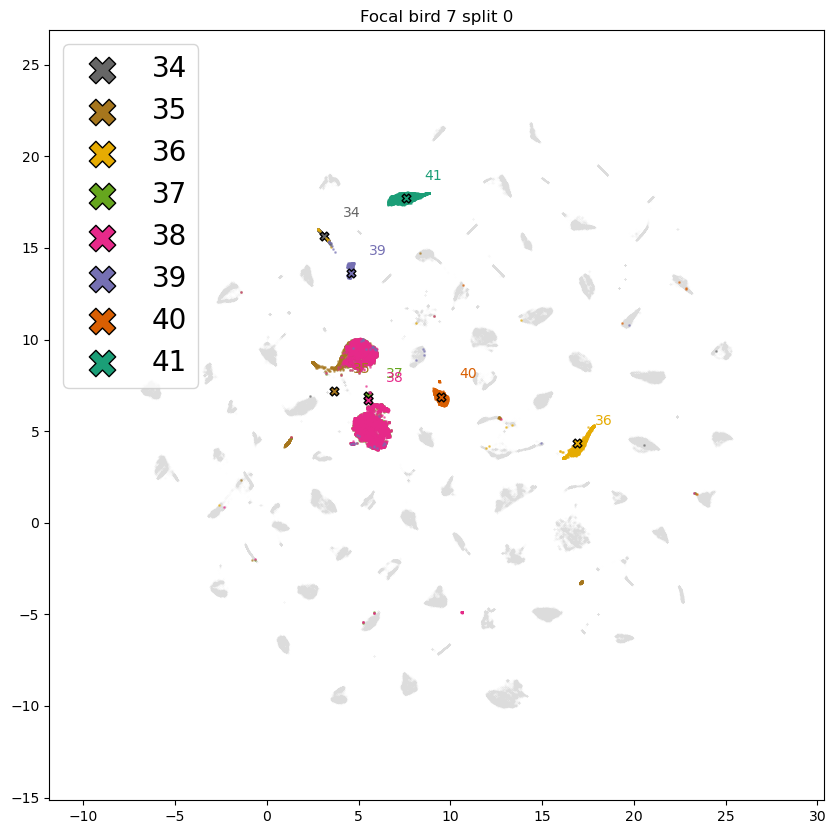

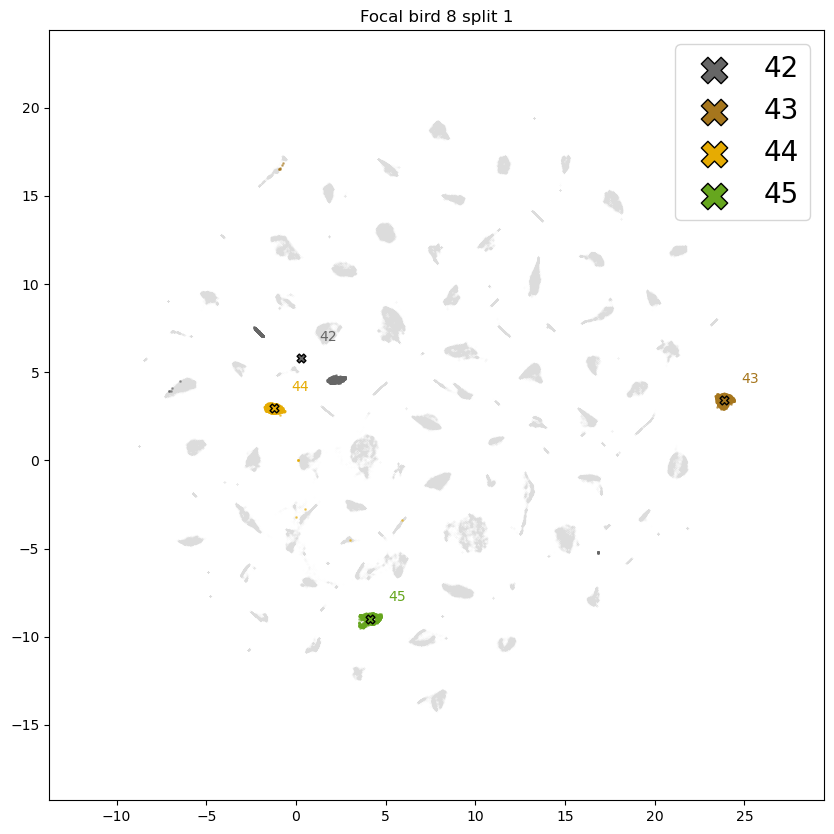

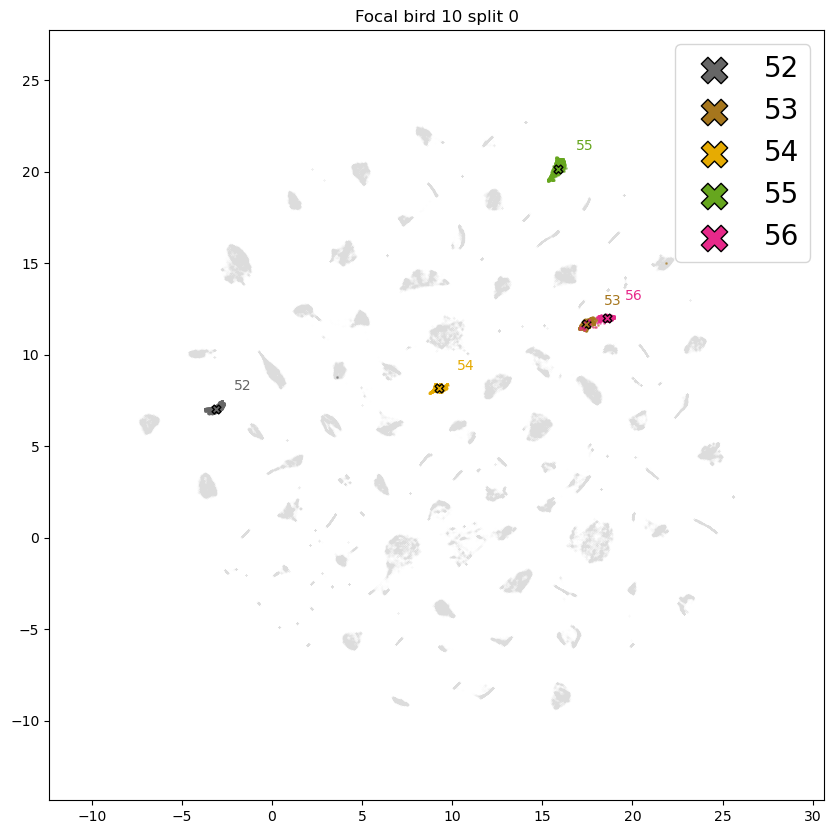

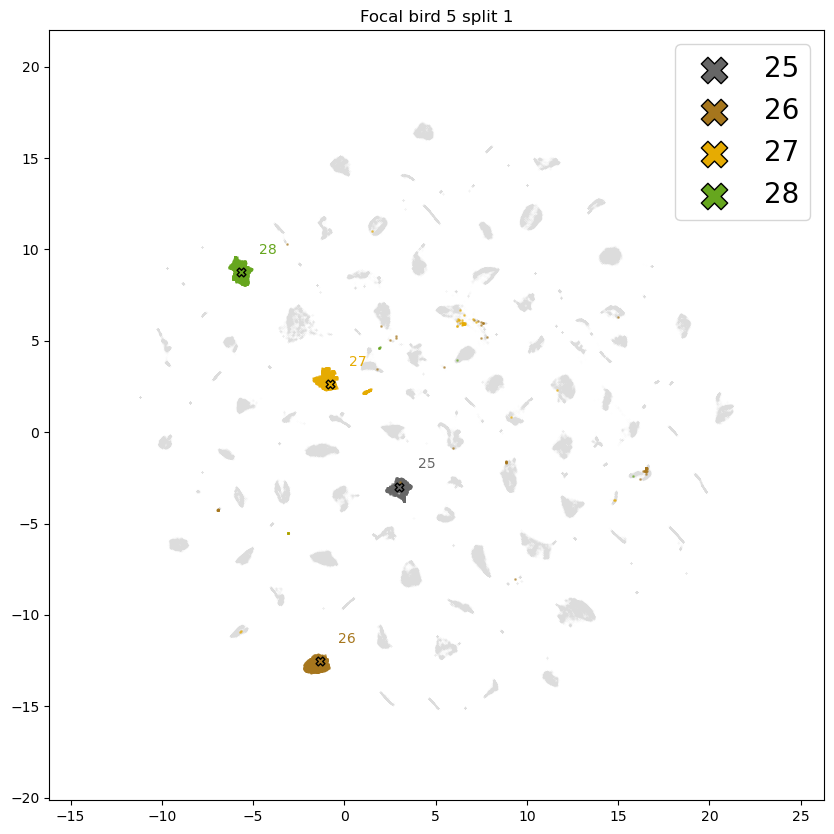

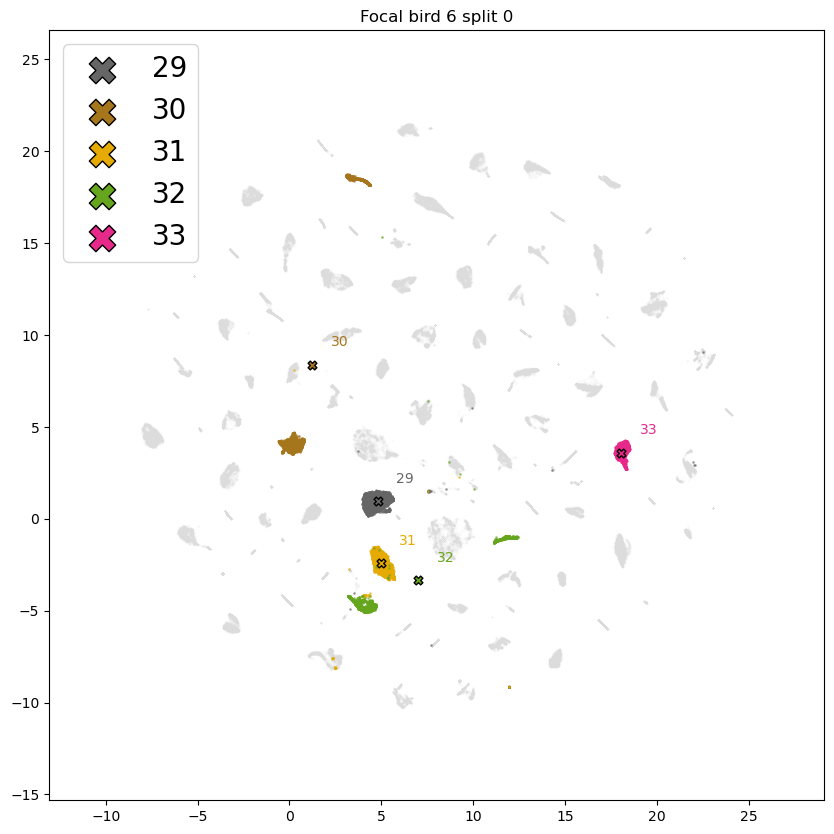

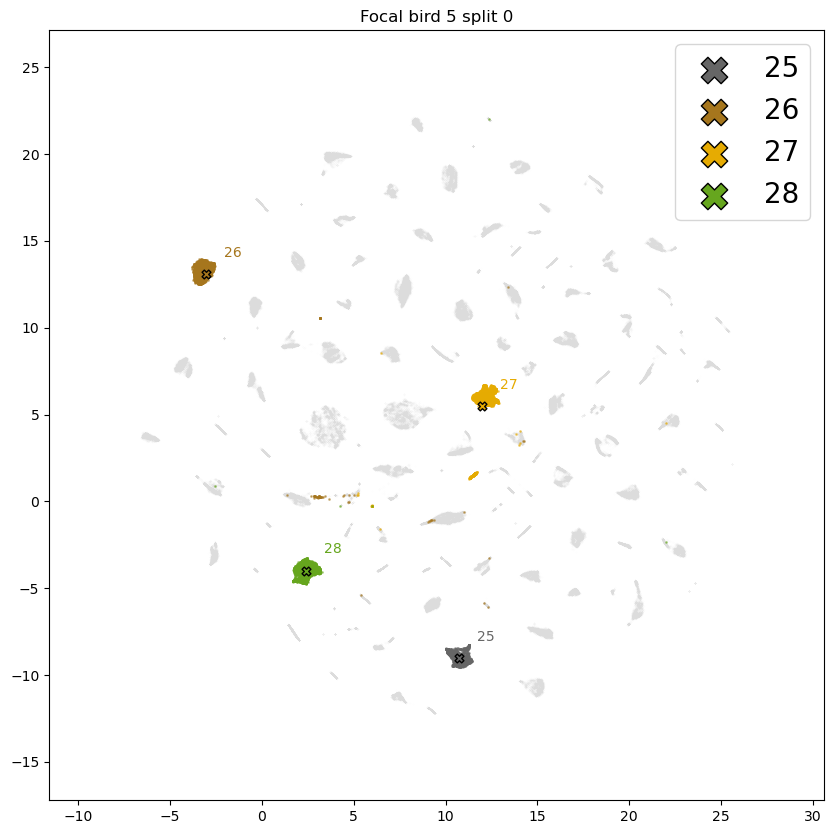

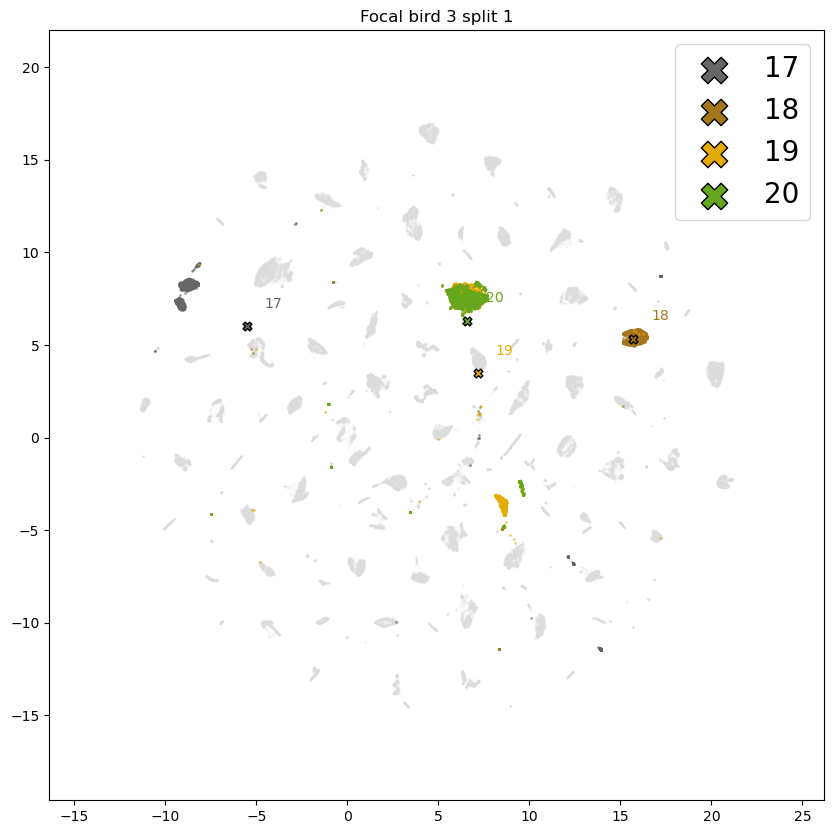

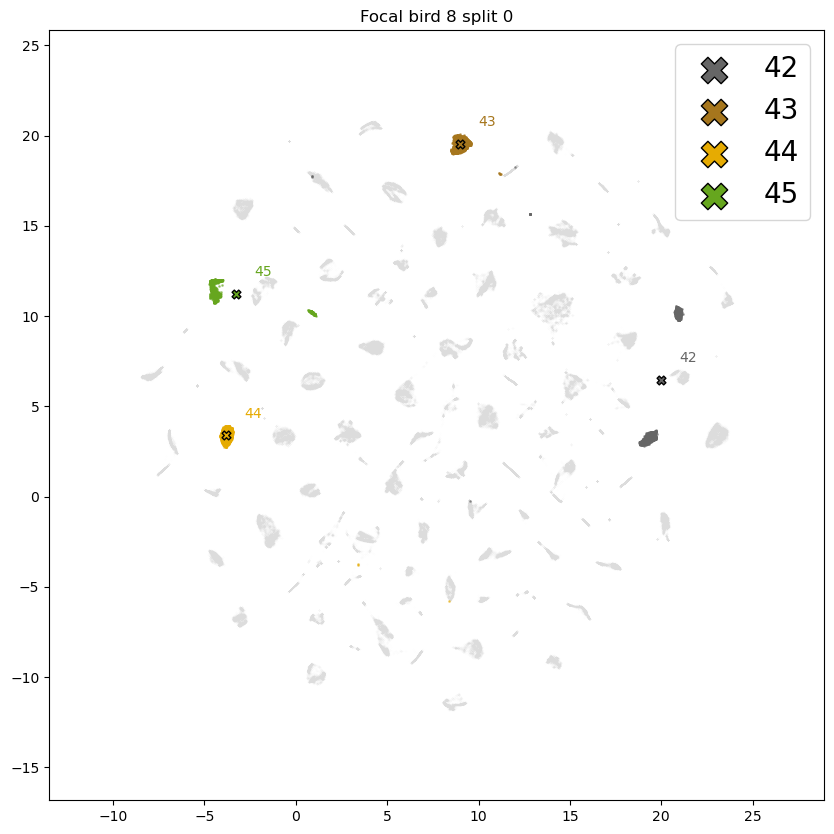

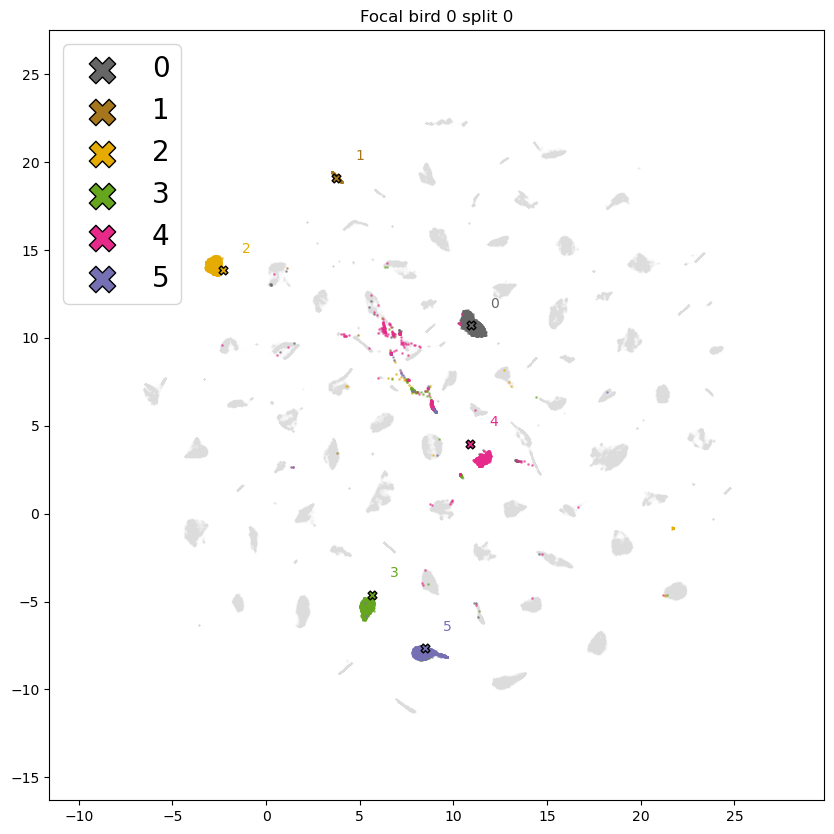

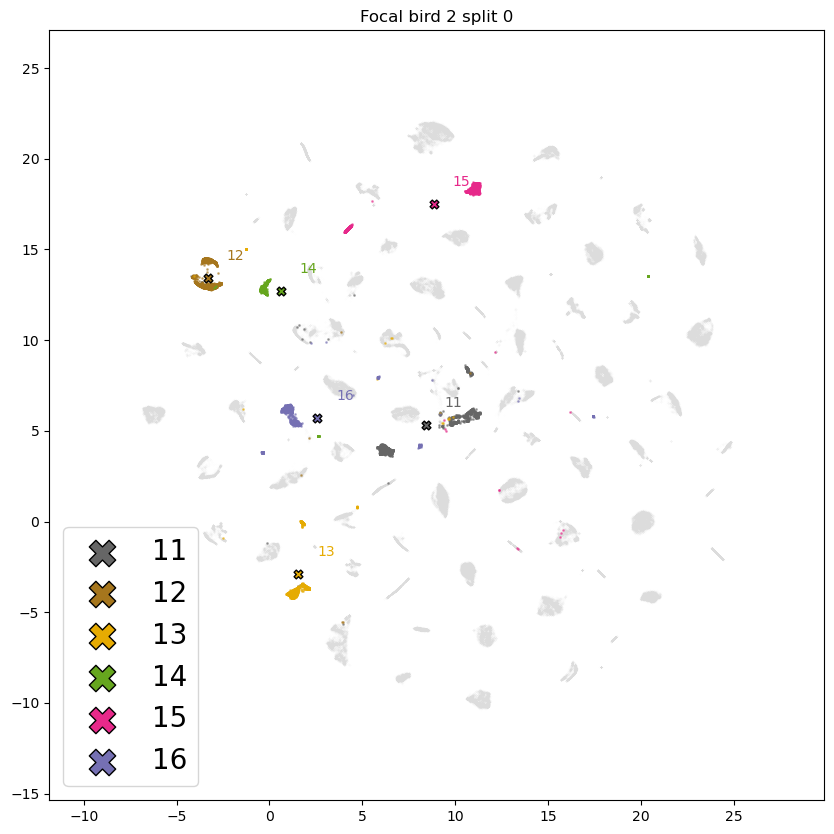

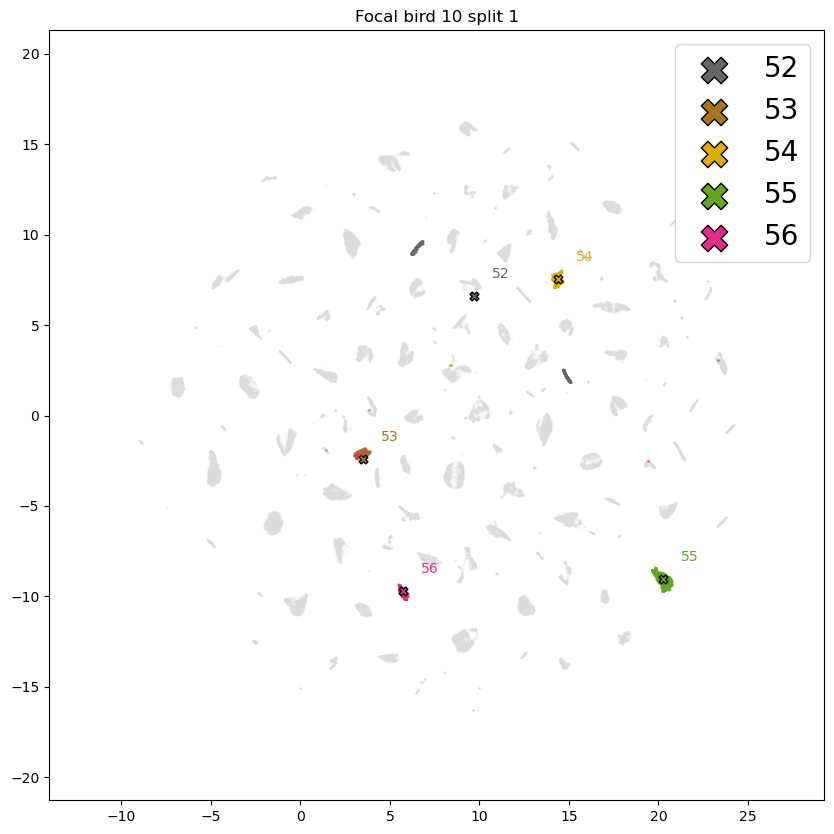

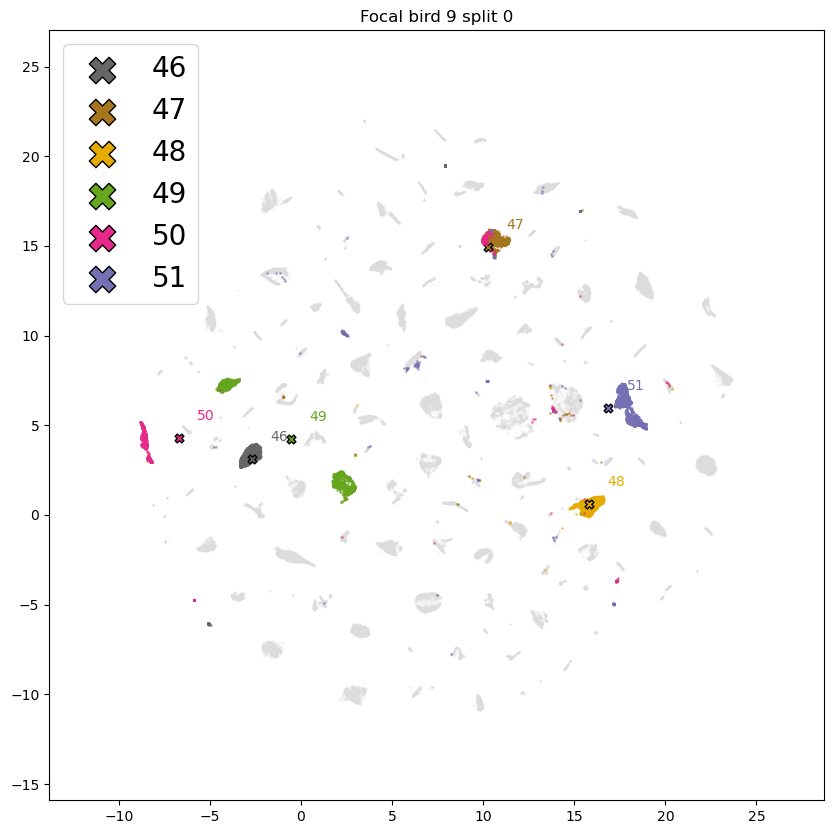

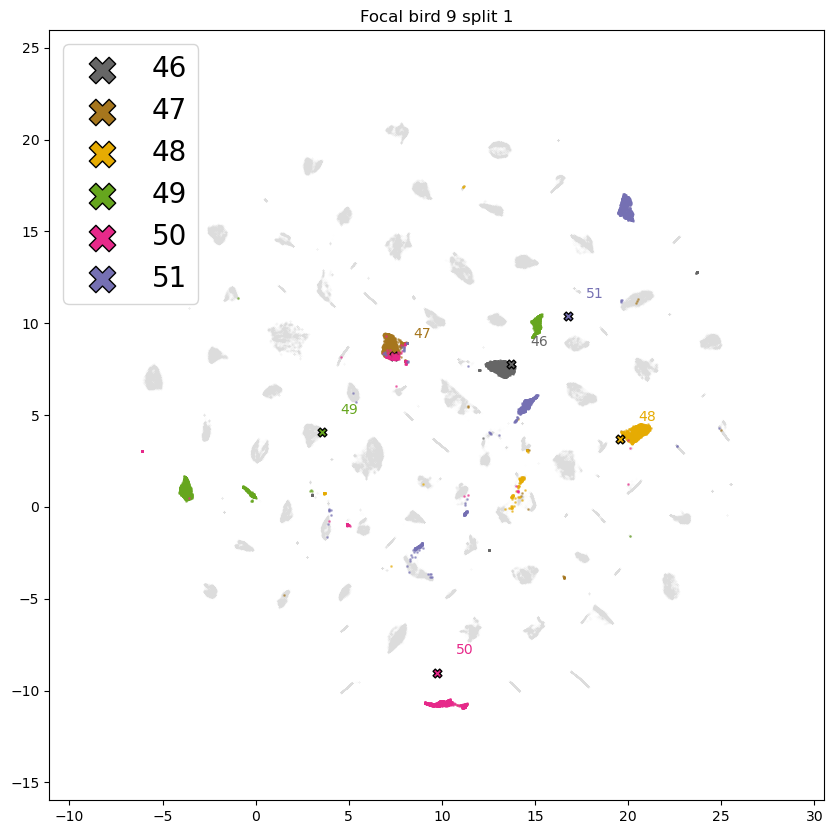

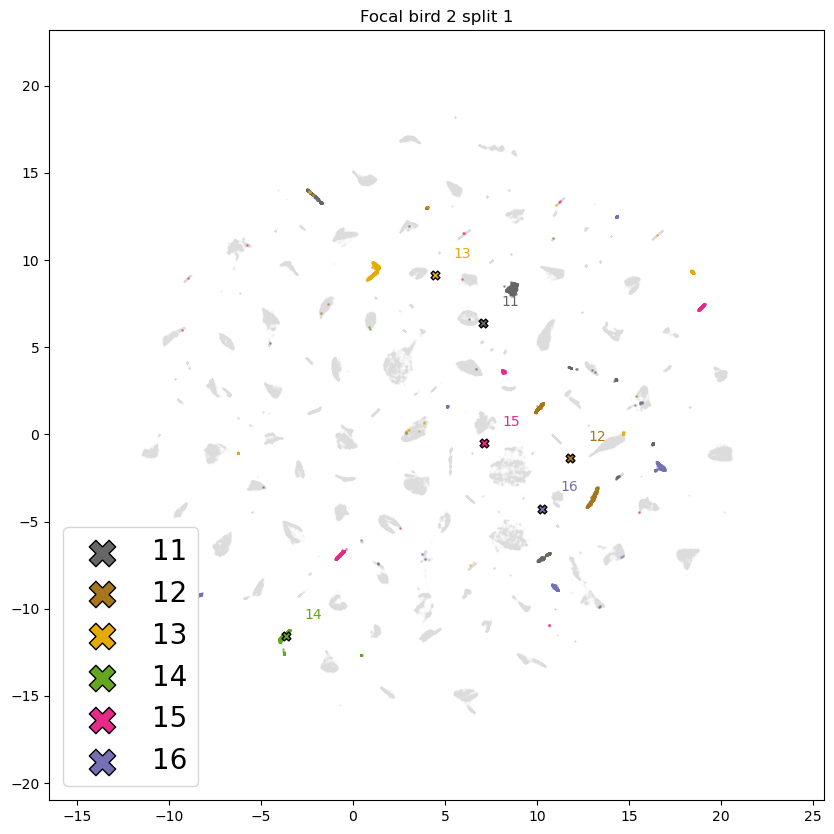

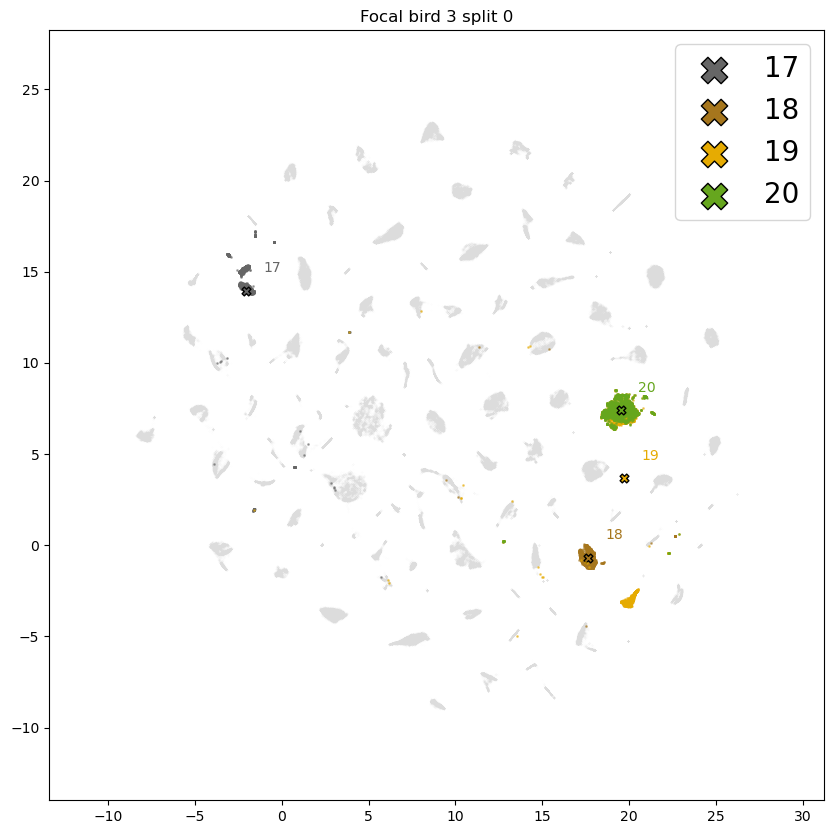

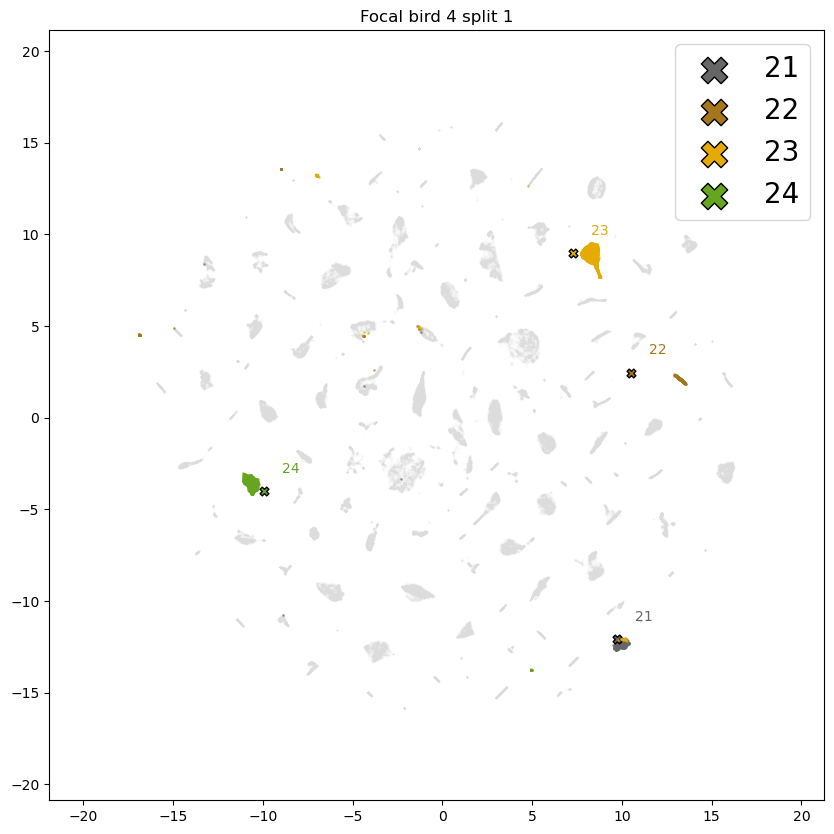

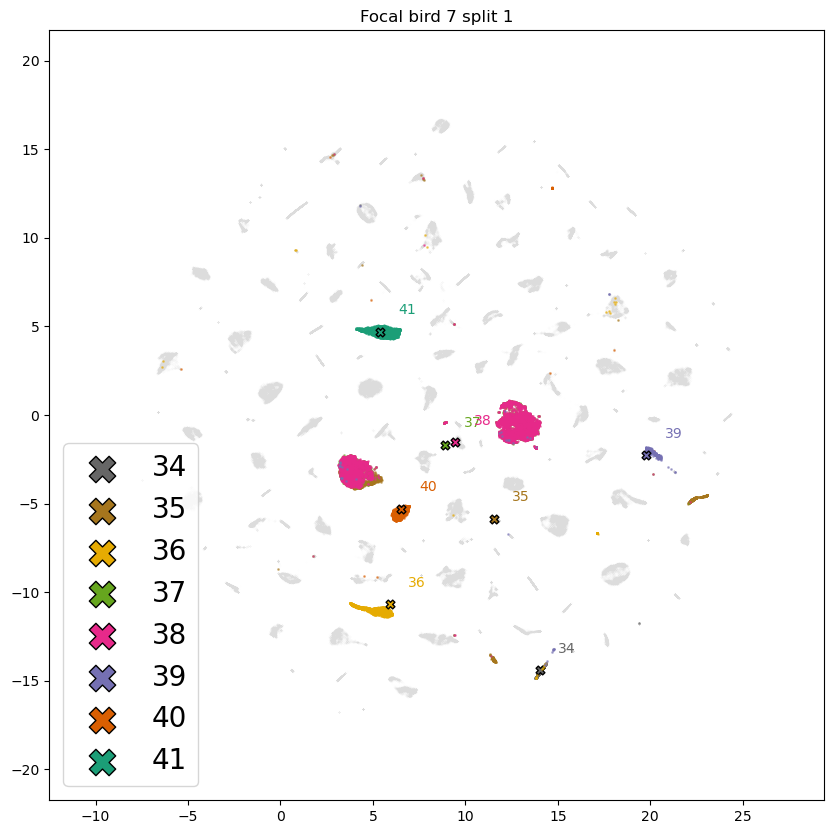

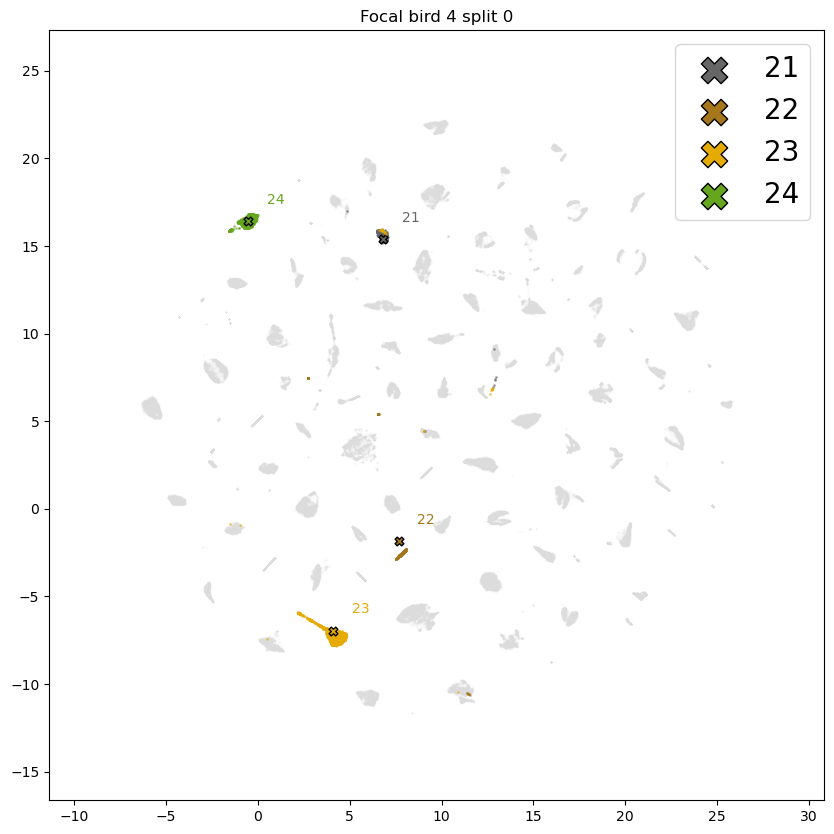

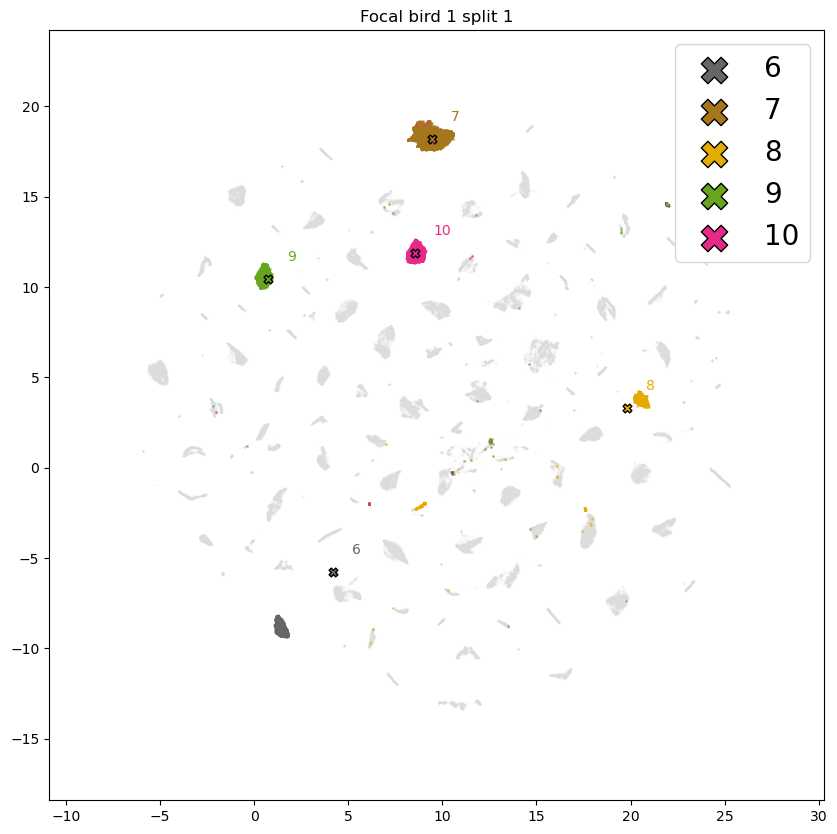

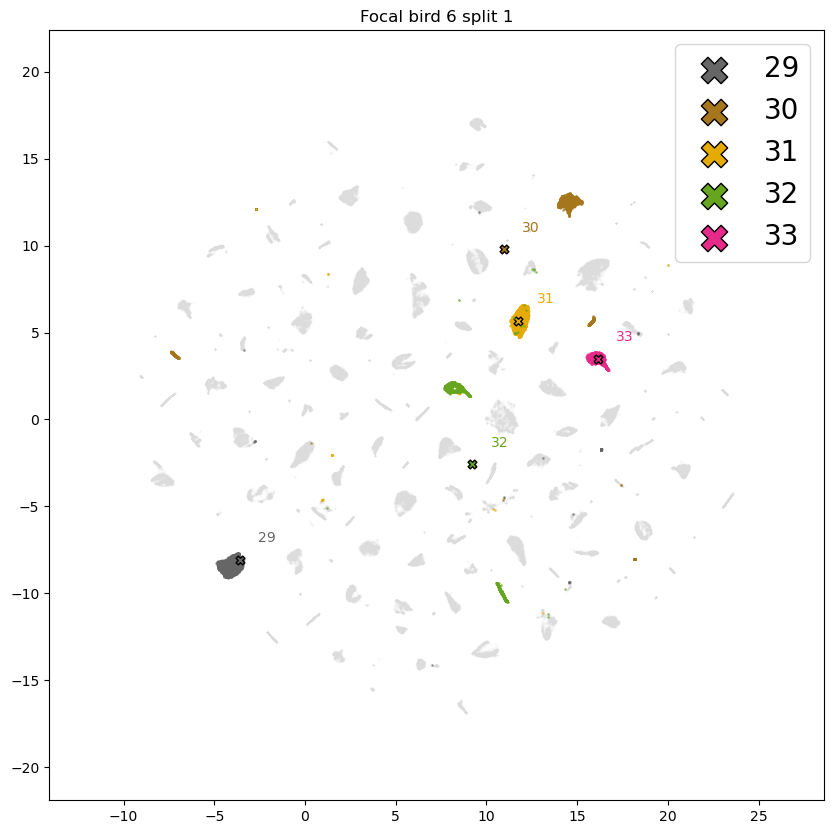

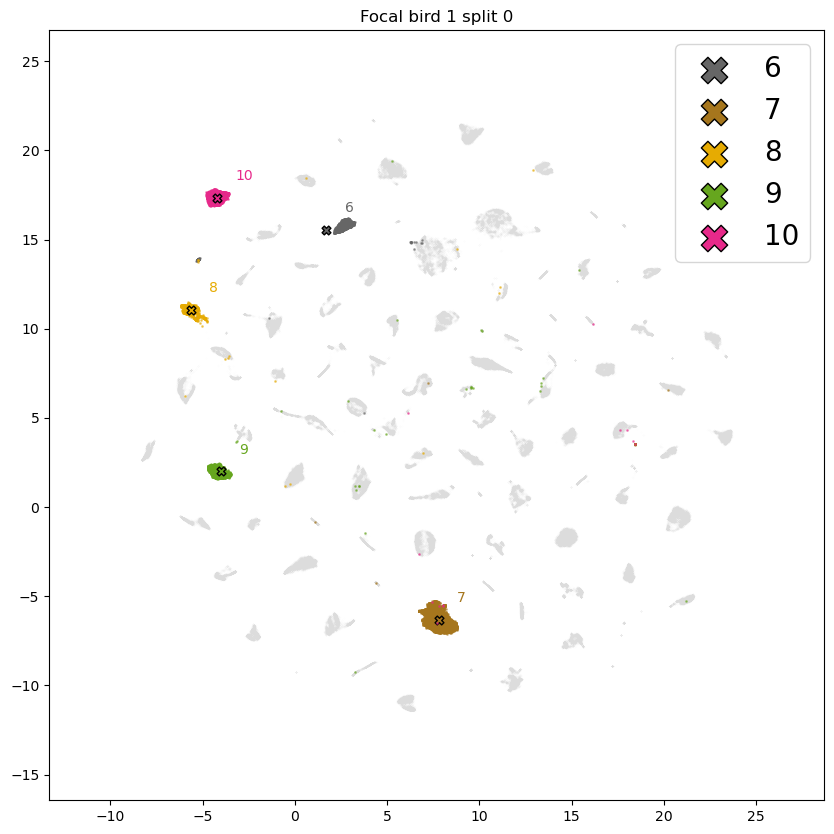

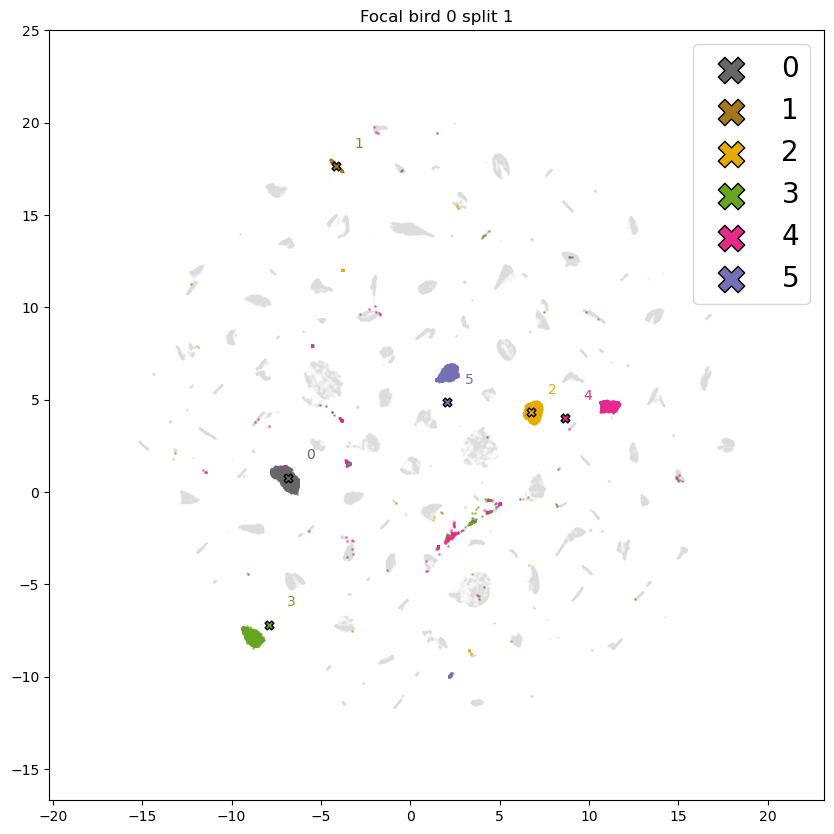

In [11]:
for embedding_file in embedding_files:
    focal_bird = embedding_file.split('.')[0].split('_')[-2]
    split_no = embedding_file.split('.')[0].split('_')[-1]
    results_filename_tag = '_' + focal_bird + '_' + split_no
    focal_bird = int(focal_bird)
    split_no = int(split_no)



    label_embedding_df = pd.read_csv(embedding_file, index_col=0)
    embedding = label_embedding_df[['x', 'y']].values


    if normalise == True:
        embedding = (embedding-embedding.min())
        embedding = embedding/embedding.max()

    cluster_labels = label_embedding_df['syll_id'].unique()
    cluster_labels.sort()
    # n_syllables = cluster_labels.shape[0]

    syll_labels = label_embedding_df['syll_id'].values
    bird_labels = label_embedding_df['bird_id'].values

    # Find the centroid = arithmetic mean of each cluster
    cluster_ameans  = np.zeros((n_syllables, 2))
    cluster_bird_id =  np.zeros((n_syllables, 1))
    cluster_ids = np.zeros((n_syllables, 1)) + 300
    for cluster_id in cluster_labels:
        cluster_points = collect_cluster(cluster_id, embedding, label_embedding_df)
        cluster_ameans[cluster_id] = calc_am(cluster_points)
        cluster_bird_id[cluster_id] = find_bird_id_of_cluster(cluster_id, label_embedding_df)
        cluster_ids[cluster_id] = cluster_id

    centroid_info = {
        'cluster_id': cluster_ids[:,0],
        'centroid_x': cluster_ameans[:,0],
        'centroid_y': cluster_ameans[:,1],
        'bird_id': cluster_bird_id[:,0]
    }



    centroid_df = pd.DataFrame(centroid_info)
    centroid_df.to_csv(centroids_folder + 'centroids' + '_normalised'*(normalise) + '_' + results_filename_tag +'.csv', index=False)  

    fig = plt.figure(figsize=(10, 10))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='gainsboro', s=.1, alpha=.01)

    bird_clusters = collect_bird_cluster(focal_bird, label_embedding_df)

    for bci, bird_cluster_id in enumerate(bird_clusters):
        bird_cluster_points = collect_cluster(bird_cluster_id, embedding, label_embedding_df)
        plt.scatter(bird_cluster_points[:, 0], bird_cluster_points[:, 1], c=cmap[bci],  s=1, alpha=.5)

        plt.scatter(cluster_ameans[bird_cluster_id,0], cluster_ameans[bird_cluster_id,1], c=cmap[bci], edgecolor='k', s=40, marker='X', label=bird_cluster_id)

        plt.text(cluster_ameans[bird_cluster_id,0]+1, cluster_ameans[bird_cluster_id,1]+1, str(bird_cluster_id),
                    color=cmap[bci])

    
    plt.title('Focal bird '  + str(focal_bird) + ' split ' + str(split_no))

    plt.xlim(embedding[:,0].min()-5, embedding[:,0].max()+5)
    plt.ylim(embedding[:,1].min()-5, embedding[:,1].max()+5)

    plt.legend(fontsize=20, markerscale=3)


    plt.savefig(centroids_folder + 'centroids' + '_normalised'*(normalise) +  '_' + results_filename_tag  +'.png')

    # plt.close()





